
#### 1. Use describe to check the mean, min and max values
#### 2. Mean AQI
#### 3. Change in line plots of particulate matter over the years
#### 4. Change in mean AQI from 2015-2020
#### 5. Correlation between the different pollutant matter.
#### 6. Pre Covid and Post Covid mean AQI
#### 

In [7]:
#pip install flask

In [9]:
import flask

In [3]:
# Importing the relevant packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

%matplotlib inline

In [5]:
# Importing the City_day.csv file and loading it onto a created dataframe 'df'

df=pd.read_excel('amravti data.xlsx')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        951 non-null    object        
 1   Date        951 non-null    datetime64[ns]
 2   PM2.5       892 non-null    float64       
 3   PM10        896 non-null    float64       
 4   NO          896 non-null    float64       
 5   NO2         896 non-null    float64       
 6   NOx         896 non-null    float64       
 7   NH3         896 non-null    float64       
 8   CO          854 non-null    float64       
 9   SO2         886 non-null    float64       
 10  O3          896 non-null    float64       
 11  Benzene     876 non-null    float64       
 12  Toluene     876 non-null    float64       
 13  Xylene      682 non-null    float64       
 14  AQI         841 non-null    float64       
 15  AQI_Bucket  841 non-null    object        
dtypes: datetime64[ns](1), floa

### There are a maximum of 951 entries (rows) and 16 columns in the dataset. Some columns  do have some missing values. We will investigate that further ahead.
##### 

In [7]:
# Checking descriptive statistical values related to the dataset such as mean, count, min, max, etc.

df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,951,892.000000,896.00000,896.000000,896.000000,896.000000,896.000000,854.000000,886.000000,896.000000,876.000000,876.000000,682.000000,841.000000
mean,2019-03-14 00:00:00,37.773217,76.36202,4.436071,22.175748,15.380413,11.988493,0.627904,14.258341,38.115100,0.546416,1.877637,0.981613,95.299643
min,2017-11-24 00:00:00,4.650000,7.80000,0.250000,1.520000,0.860000,0.300000,0.000000,2.900000,7.510000,0.000000,0.000000,0.010000,24.000000
25%,2018-07-19 12:00:00,17.060000,40.80000,2.000000,9.767500,7.345000,7.575000,0.450000,9.655000,25.395000,0.060000,0.200000,0.100000,55.000000
50%,2019-03-14 00:00:00,28.015000,64.89500,3.240000,15.350000,10.990000,11.265000,0.590000,13.030000,32.965000,0.120000,0.945000,0.130000,78.000000
75%,2019-11-06 12:00:00,52.737500,104.81250,5.202500,25.605000,17.830000,16.430000,0.790000,17.255000,44.990000,0.290000,2.460000,0.180000,115.000000
max,2020-07-01 00:00:00,139.380000,230.27000,43.760000,140.170000,103.490000,35.200000,1.840000,66.390000,138.180000,53.890000,76.320000,137.450000,312.000000
std,NaN,27.255732,43.89199,4.160487,20.563270,13.078959,5.791911,0.327470,6.807757,19.283117,3.323205,3.521725,8.770975,56.061409


### We know that the AQI score is derived from the scores assigned to individual particulate matters including PM2.5, PM10, NO, etc. Hence, we will focus our attention on the AQI score here.

### From the above table, we can see that the average AQI score is approximately 95, the minimum AQI score is 24 and the maximum AQI score is 312. Since the 75 percentile AQI value is 115, which is very close to the average of 95, we can deduce that majority of the points on the dataset fall within the 0-200 range.

### This puts these city in a Moderate AQI range. Moderate AQI levels can possibly cause breathing discomfort to people with lung diseases, Asthma, and Heart diseases.
### 

In [8]:
# Checking the number of missing values in each of the columns

# Calculating the proportion of null values in each of the features

missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.282860
AQI,0.115668
AQI_Bucket,0.115668
CO,0.101998
Benzene,0.078864
Toluene,0.078864
SO2,0.068349
PM2.5,0.062040
PM10,0.057834
NO,0.057834


### Certain columns in the dataset have a higher percentage of missing values. For example Xylene has 28.28% missing values. CO has 10.19% missing values.

### Since AQI is a combined metric inclusive of the particulate matters, we focus on the AQI column. The AQI columns has 11.56% missing values.

### Since we will be using the mean values in our AQI analysis, we will use a Simple Imputer to fill up the missing values in the AQI column.

### We will leave the other columns as they are since they have a small role to play in our analysis.
### 

In [9]:
# Imputing the Dataset

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df["AQI"] = imp.fit_transform(df[['AQI']])

In [9]:
# Checking the number of missing values in each of the columns

# Calculating the proportion of null values in each of the features

missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196
SO2,0.130507


### Now AQI has no missing values.
#### 

In [10]:
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False


rcParams['figure.dpi']=300

rcParams['figure.autolayout']=True

rcParams['font.style']='normal'
rcParams['font.size']=4

rcParams['lines.linewidth']=0.7


rcParams['xtick.labelsize']=4
rcParams['ytick.labelsize']=4

# Change in the concentration of individual Particulate matter over the years

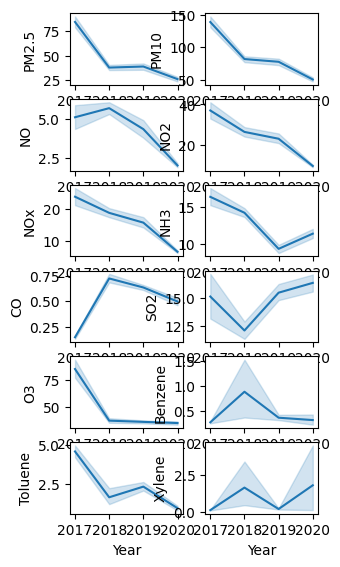

In [11]:
# Segregating the date into Month and Year and forming new columns in the dataframe

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)


# Visualizing change in amount of particulate matter and gases over the years

cols=['PM2.5','PM10','NO','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(3.2,6.5))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

### Of these 12 types of particulate matters, 7 types of particulate matter primarily arise from Vehicular pollution and the other 5 types of particulate matter primarily arise from Industrial pollution.

### Vehicular pollution particulate matter - 'PM2.5','PM10','NO','NO2','NOx','NH3','CO'
### Industrial pollution particulate matter - 'SO2','O3','Benzene','Toluene','Xylene'

### We can see that from 2015 to 2020, the amount of particulates relating to vehicular pollution have gone down. However, when we look at the amount of particulates related to industrial pollution, we can see that the amount of Benzene and Toluene in the air has shot up. We need to investigate the reason for this increase.
#### 

# Change in mean AQI from 2015 to 2020

In [12]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,95.299643,NaN,11,2017
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.000000,Moderate,11,2017
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.000000,Moderate,11,2017
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.000000,Moderate,11,2017
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.000000,Moderate,11,2017
5,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.000000,Moderate,11,2017
6,Amaravati,2017-11-30,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.000000,Moderate,11,2017
7,Amaravati,2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.000000,Moderate,12,2017
8,Amaravati,2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.000000,Moderate,12,2017
9,Amaravati,2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.000000,Poor,12,2017


In [40]:
#Grouping the AQI by year and calculating the average AQI per year

x=pd.DataFrame(df.groupby(['Year'])[['AQI']].mean().sort_values(by=['Year']))
x=x.reset_index(['Year'])

In [13]:
x.head(20)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,95.299643,NaN,11,2017
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.000000,Moderate,11,2017
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.000000,Moderate,11,2017
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.000000,Moderate,11,2017
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.000000,Moderate,11,2017
5,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.000000,Moderate,11,2017
6,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.000000,Moderate,11,2017
7,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.000000,Moderate,12,2017
8,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.000000,Moderate,12,2017
9,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.000000,Poor,12,2017


Text(0.5, 0, 'AQI of Amaravati over the years')

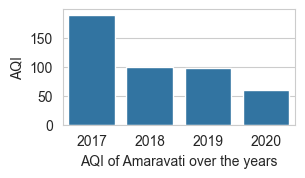

In [41]:
# Plotting the average AQI of Amaravati over the years

sns.set_style("whitegrid")
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,y='AQI',x='Year',orient = 'v')
plt.xlabel('AQI of Amaravati over the years')

# Correlation between the different pollutant matter

In [48]:
#correlation analysis

plt.figure(figsize=(3,2))

sns.heatmap(df.corr(),
            annot=True,fmt='0.1f',
            robust=True,
            cmap='Reds')
plt.title('Correlation Analysis')

ValueError: could not convert string to float: 'Amaravati'

<Figure size 300x200 with 0 Axes>

### There is very little correlation observed among the amounts of the different particulate matter. Looking at the correlation of different particulate matters to the AQI column, we can see that PM10, CO, and PM2.5 seem to have some amount of correlation with the AQI scores. We could make a conclusion then that PM10, CO, and PM2.5 have a higher weightage in calculating the final AQI score.
### 

# Cities that enjoy the most number of clean days

C:\Users\vedant\AppData\Local\Temp\ipykernel_24324\3775085739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City',y=x.index,data=x,palette='crest',legend=False)


<Axes: xlabel='City', ylabel='City'>

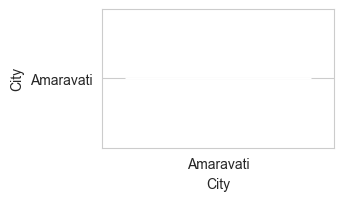

In [46]:
x=pd.DataFrame(df['City'][df['AQI']< 100].value_counts())/pd.DataFrame(df['City'].value_counts())*100
#x=x.rename(columns={'City':'Percentage of Days the AQI level was below 100'})
x.sort_values(by='City', ascending=False, inplace = True)

plt.figure(figsize=(3,1.8))
sns.barplot(x='City',y=x.index,data=x,palette='crest',legend=False)

# Identifying if there is a change in the Mean AQI levels in Pre-Covid time (Apr 2019 - Jun 2019) to Post-Covid time (Apr 2020 - Jun 2020)

In [24]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,95.299643,NaN,11,2017
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.000000,Moderate,11,2017
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.000000,Moderate,11,2017
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.000000,Moderate,11,2017
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.000000,Moderate,11,2017


In [25]:
city_select = 'Amaravati'

Text(0.5, 0, 'AQI of Delhi in 2019 (Pre-Covid)')

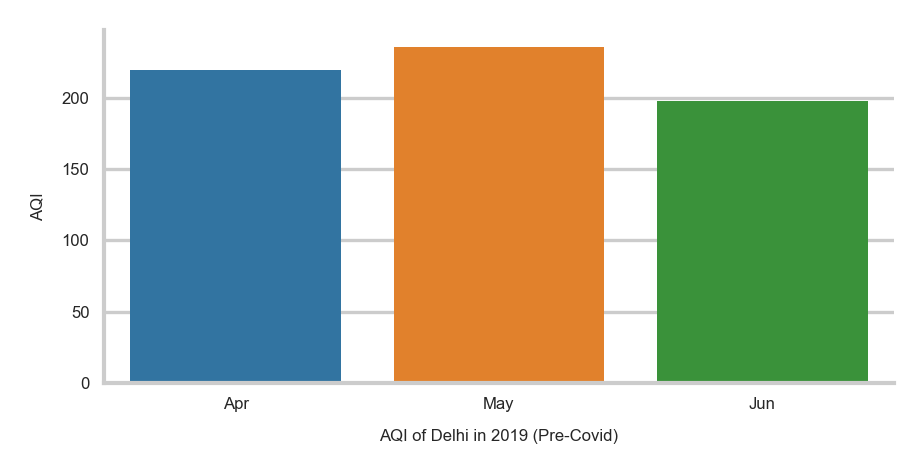

In [26]:
df_cs_19 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2019')]


#Grouping the AQI by month and calculating the average AQI per month

x_19=pd.DataFrame(df_cs_19.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_19=x_19.reset_index(['Month'])
x_19 = x_19.replace(['4','5','6'],['Apr','May','Jun'])


# Plotting the average AQI of Ahmedabad over the months of 2019

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x_19,y='AQI',x='Month',orient = 'v')
plt.xlabel('AQI of ' + city_select + ' in 2019 (Pre-Covid)')

Text(0.5, 0, 'AQI of Amaravati in 2020 (Post-Covid)')

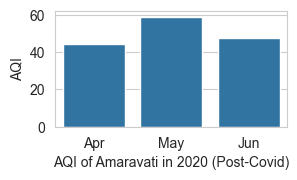

In [47]:
df_cs_20 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2020')]

#Grouping the AQI by month and calculating the average AQI per month

x_20=pd.DataFrame(df_cs_20.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_20=x_20.reset_index(['Month'])
x_20 = x_20.replace(['4','5','6'],['Apr','May','Jun'])

# Plotting the average AQI of Ahmedabad over the months of 2019

sns.set_style("whitegrid")
plt.figure(figsize=(3,1.5))
sns.barplot(data=x_20,y='AQI',x='Month',orient = 'v')
plt.xlabel('AQI of ' + city_select + ' in 2020 (Post-Covid)')

C:\Users\vedant\AppData\Local\Temp\ipykernel_24324\1070861385.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splot1.set_xticklabels(['Apr','May','Jun'],size=13)
C:\Users\vedant\AppData\Local\Temp\ipykernel_24324\1070861385.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splot1.set_yticklabels(splot1.get_yticks().round(decimals=0), size=13)
C:\Users\vedant\AppData\Local\Temp\ipykernel_24324\1070861385.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splot2.set_xticklabels(['Apr','May','Jun'],size=13)
C:\Users\vedant\AppData\Local\Temp\ipykernel_24324\1070861385.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splot2.set_yticklabels(splot2

[Text(0, 0.0, '0.0'),
 Text(0, 10.0, '10.0'),
 Text(0, 20.0, '20.0'),
 Text(0, 30.0, '30.0'),
 Text(0, 40.0, '40.0'),
 Text(0, 50.0, '50.0'),
 Text(0, 60.0, '60.0'),
 Text(0, 70.0, '70.0')]

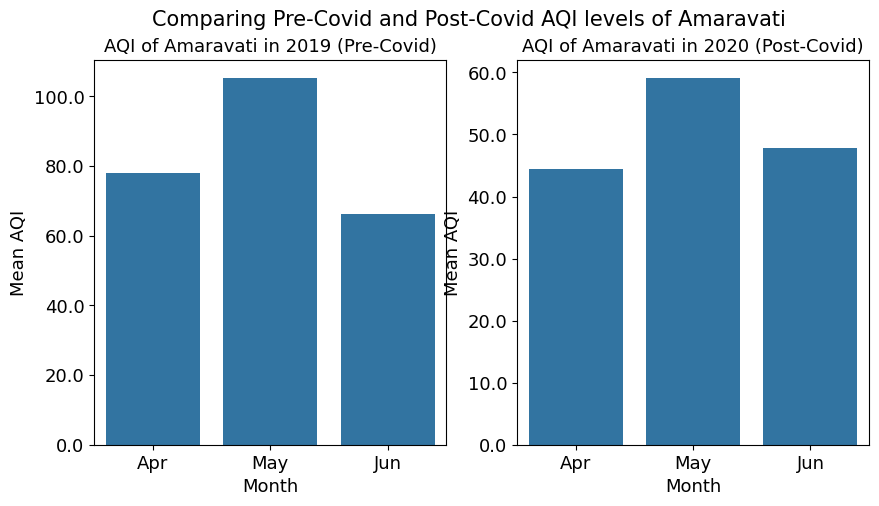

In [16]:
city_select = 'Amaravati'

df_cs_19 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2019')]
#Grouping the AQI by month and calculating the average AQI per month
x_19=pd.DataFrame(df_cs_19.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_19=x_19.reset_index(['Month'])
x_19 = x_19.replace(['4','5','6'],['Apr','May','Jun'])


df_cs_20 = df[(df['City']==city_select) & (df['Month'].isin(['4','5','6'])) & (df['Year'] == '2020')]
#Grouping the AQI by month and calculating the average AQI per month
x_20=pd.DataFrame(df_cs_20.groupby(['Month'])[['AQI']].mean().sort_values(by=['Month']))
x_20=x_20.reset_index(['Month'])
x_20 = x_20.replace(['4','5','6'],['Apr','May','Jun'])



fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Comparing Pre-Covid and Post-Covid AQI levels of {}'.format(city_select),size=15)

axes[0].set_title('AQI of ' + city_select + ' in 2019 (Pre-Covid)',size=13)
splot1 = sns.barplot(ax=axes[0], data=x_19,y='AQI',x='Month',orient = 'v')
splot1.set_xlabel('Month',size=13)
splot1.set_ylabel('Mean AQI',size=13)
splot1.set_xticklabels(['Apr','May','Jun'],size=13)
splot1.set_yticklabels(splot1.get_yticks().round(decimals=0), size=13)

axes[1].set_title('AQI of ' + city_select + ' in 2020 (Post-Covid)',size=13)
splot2 = sns.barplot(ax=axes[1], data=x_20,y='AQI',x='Month',orient = 'v')
splot2.set_xlabel('Month',size=13)
splot2.set_ylabel('Mean AQI',size=13)
splot2.set_xticklabels(['Apr','May','Jun'],size=13)
splot2.set_yticklabels(splot2.get_yticks().round(decimals=0), size=13)

In [27]:
splot1.get_yticks().round(decimals=0)

array([  0.,  20.,  40.,  60.,  80., 100., 120.])